# Boston House Prices
***

The following notebook will attempt to address the following:

This assessment concerns the well-known Boston House Prices [1] dataset and the
Python [3] packages scipy [2], keras [7], and jupyter [6]. 

There are three parts which will be addressed:
***
1. Description of the dataset: 
Use descriptive statistics and plots to describe the Boston House Prices dataset.

***
2. Inferential statistics for the Charles River House Prices: 
Use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. You should explain and discuss your findings within the notebook.

***
3. Predict: Create a neural network
Create a neural network that can predict the median house price based on the other variables in the dataset.

***

***
### 1. Description of the dataset
***

The Boston House prices dataset is drawn from the Boston Standard Metropolitan Statisical Area in 1970. Each record describes a Boston suburb or town. There are several attributes included for each of these records. There are 506 records and each of these has 13 variables, which may have an influence on the pricing of the houses in question. The aim is to predict the house prices using the 13 variables.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# Pretty display for notebooks
%matplotlib inline

#Importing the dataset
boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:
# I reimport the dataset in this way because it contains the descriptions and I think it is important to have these included here
from sklearn.datasets import load_boston
bos = load_boston()

#print out the variables within the dataset with their keys and explanations
print(bos.keys())
dict_keys = bos.keys
dict_keys()

#load the explanations of the keys with sklearn
print(bos.DESCR) 

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,0

C:\Users\luisa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


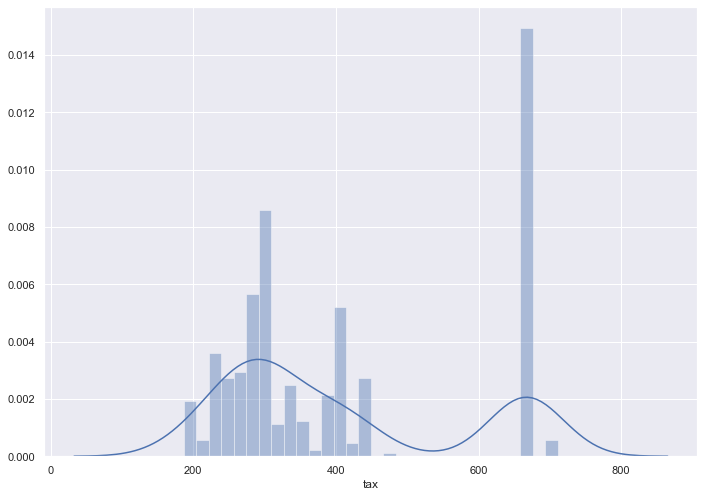

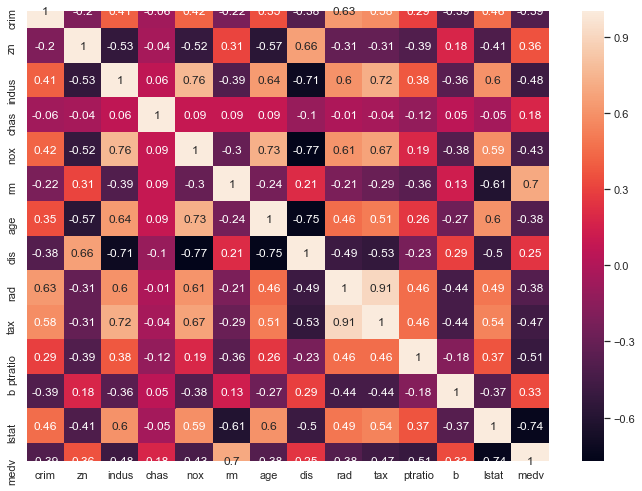

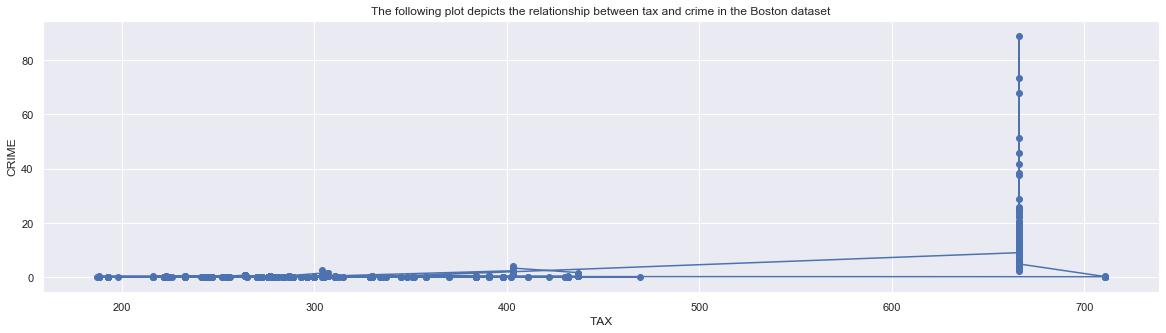

In [4]:
bopd = pd.DataFrame(boston)
# I am looking at the relationship between crime and tax within the dataset
#print(bopd.head())
bopd1 = boston.iloc[:, 0]
tax = boston.iloc[:, 9]
# this sets the size of the figure
sns.set(rc = {'figure.figsize':(11.7,8.27)})
# this creates a plot of the dataset, based on the TAX variable, separated into 30 bins to better display the data
sns.distplot(tax, bins = 30)
plt.show()
# create a correlation matrix between the variables
correlation_matrix = bopd.corr().round(2)

# create a heatmap of the correlation data, a value close to -1 stands for a negative correlation, a value close to 1 means a positive correlation
sns.heatmap(data = correlation_matrix, annot = True)
plt.figure(figsize = (20, 5))
features = ['CRIM']
target = ['TAX']

for i, col in enumerate (features):
    x = bopd.iloc[:, 9]
    y = bopd.iloc[:, 0]
    plt.plot(x, y)
    plt.scatter(x, y, marker = 'o')
    plt.title('The following plot depicts the relationship between tax and crime in the Boston dataset')
    plt.xlabel('TAX')
    plt.ylabel('CRIME')

Based on the results, there are two areas of interest, between 200 and 400 and then the most significant spike at around 680. The tax variable is measured as the "full-value property-tax rate per $10,000". So, this would mean there seems to be a positive correlation between the full-value property-tax rate and the per capita crime rate per town. In other words, the more expensive the neighbourhood the higher the crime rate.

### 2. Inferential statistics for the Charles River House Prices

In [27]:
# Loop through the dataset based on CHAS for prices as CHAS is the dummy variable for Charles River.
import numpy as np
import pandas as pd
from scipy import stats

boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
# Splitting the dataset based on whether the properties are along the Charles River or not.
CharlesRiver = boston.iloc[:,3] == 1
otherBoston = boston.iloc[:,3] == 0
#The other variable of interest is the price of the property
price = boston.iloc[:,-1]

# Minimum price of the data
minimum_price = np.amin(price) + CharlesRiver
min_price = np.amin(price) + otherBoston

# Maximum price of the data
maximum_price = np.amax(price) + CharlesRiver
max_price = np.amax(price) + otherBoston

# Mean price of the data
mean_price = np.mean(price) + CharlesRiver
other_mean_price = np.mean(price) + otherBoston

# Median price of the data
median_price = np.median(price) + CharlesRiver
med_price = np.median(price) + otherBoston

# Standard deviation of prices of the data
std_price = np.std(price) + CharlesRiver
other_std_price = np.std(price) + otherBoston

# Show the calculated statistics
print("Statistics for the Charles River houses:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))
print("Statistics for houses not along the Charles River:\n")
print("Minimum price: ${}".format(min_price)) 
print("Maximum price: ${}".format(max_price))
print("Mean price: ${}".format(other_mean_price))
print("Median price ${}".format(med_price))
print("Standard deviation of prices: ${}".format(other_std_price))

Statistics for the Charles River houses:

Minimum price: $0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
501    5.0
502    5.0
503    5.0
504    5.0
505    5.0
Name: chas, Length: 506, dtype: float64
Maximum price: $0      50.0
1      50.0
2      50.0
3      50.0
4      50.0
       ... 
501    50.0
502    50.0
503    50.0
504    50.0
505    50.0
Name: chas, Length: 506, dtype: float64
Mean price: $0      22.532806
1      22.532806
2      22.532806
3      22.532806
4      22.532806
         ...    
501    22.532806
502    22.532806
503    22.532806
504    22.532806
505    22.532806
Name: chas, Length: 506, dtype: float64
Median price $0      21.2
1      21.2
2      21.2
3      21.2
4      21.2
       ... 
501    21.2
502    21.2
503    21.2
504    21.2
505    21.2
Name: chas, Length: 506, dtype: float64
Standard deviation of prices: $0      9.188012
1      9.188012
2      9.188012
3      9.188012
4      9.188012
         ...   
501    9.188012
502    9.188012
503    9

In [33]:
import statsmodels.api as sm
a = boston.iloc[:,3]
b = price

model = sm.OLS(b, a).fit()
predictions = model.predict(a)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.094
Model:                            OLS   Adj. R-squared (uncentered):              0.093
Method:                 Least Squares   F-statistic:                              52.69
Date:                Wed, 11 Dec 2019   Prob (F-statistic):                    1.48e-12
Time:                        08:08:32   Log-Likelihood:                         -2308.0
No. Observations:                 506   AIC:                                      4618.
Df Residuals:                     505   BIC:                                      4622.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
chas          28.4400      3.918      7.259      0.000      20.743      36.137
==============================================================================
Omnibus:                       24.458   Durbin-Watson:                   0.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.858
Skew:                          -0.061   Prob(JB):                     6.77e-16
Kurtosis:                       4.816   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

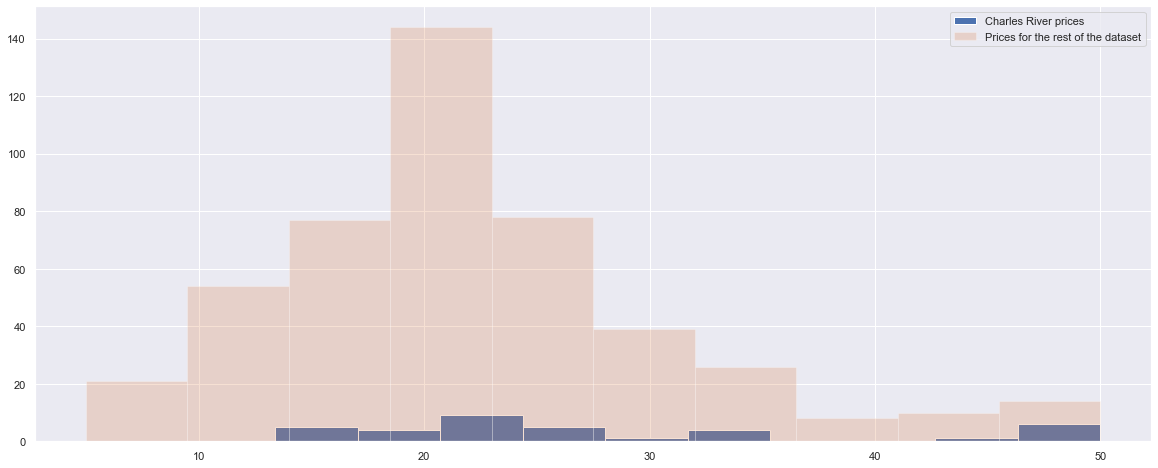

In [6]:
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(20,8),facecolor='w', edgecolor='k')
plt.hist(price[CharlesRiver], label='Charles River prices')
plt.hist(price[otherBoston], label='Prices for the rest of the dataset', alpha=0.25)

plt.legend()

In [7]:
stats.f_oneway(price[CharlesRiver], price[otherBoston])

F_onewayResult(statistic=15.971512420371962, pvalue=7.390623170520815e-05)

1.9623155373028414


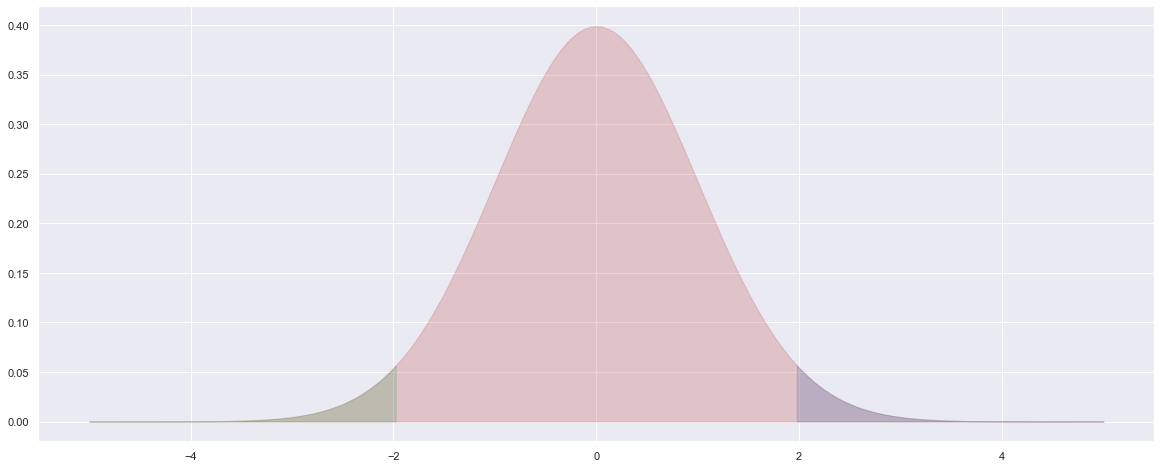

In [34]:
# Increasing the size of the figure
fig = plt.subplots(figsize=(20,8),facecolor='w', edgecolor='k')
# X values for plotting
x = np.linspace(-5.0, 5.0, 550)

# The pdf for the t-distribution
# The number of degrees of freedom s (nA + nB -2)
pdf = stats.t.pdf(x, (CR + oB - 2.0))

# Use x and pdf to create a dataframe
df = pd.DataFrame({'x': x, 'y': pdf})

# Plot the overall distribution
plt.fill_between(df['x'], df['y'], color="r", alpha=0.25)

# Plot the values which are more extreme than our |t|
crit = np.abs(stats.t.ppf(0.975, CR + oB - 2.0))
tail1 = df[df['x'] >= crit]
tail2 = df[df['x'] <= - crit]
plt.fill_between(tail1['x'], tail1['y'], color='b', alpha=0.25)
plt.fill_between(tail2['x'], tail2['y'], color='g', alpha=0.25)

print(crit)

plt.show()

***
The inferential statistics show that the median house price for properties along the Charles river is 212.000 US Dollars. The mean price is close enough to this at 225.328 US Dollars. Nevertheless, the standard deviation seems to be quite high at 91.880 US Dollars and especially when looking at the minimum and maximum prices, 50.000 US Dollars and 500.000 US Dollars. In comparison, the houses not along the Charles River have a median price of 222.000 US Dollars. The mean price is 235.328 US Dollars. The minimum price for these houses is 60.000 US Dollars and the maximum is 510.000 US Dollars. The standard deviation for this datasubset is 101.880 US. From the above it seems safe to conclude that the house prices are lower and according to the analysis of variance it is significantly lower, the p-value is 7.390623170520815e-05 which is 0.00007390623170520815 and therefore there is a significant difference in the house prices. The correlation is a negative one, meaning that the house prices along the Charles River are significantly lower compared to the rest of the dataset. This is also suggested by the graphs above.
***

### 3. Predict: Creating a neural network
***

In [35]:
# Importing keras
import keras as kr
from keras.datasets import boston_housing

# Splitting the dataset into training and test sets
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Take a look at the data
print(f'Training data : {train_data.shape}')
print(f'Test data : {test_data.shape}')
print(f'Training sample : {train_data[0]}')
print(f'Training target sample : {train_targets[0]}')

C:\Users\luisa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\luisa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\luisa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\luisa\Anaconda3\lib\site-packages\tensorflow\python\framework\

Training data : (404, 13)
Test data : (102, 13)
Training sample : [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Training target sample : 15.2


In [36]:
# Calculating the mean of the training data sample
mean = train_data.mean(axis=0)
train_data -= mean
# Calculate the standard deviation of the training date
std = train_data.std(axis=0)
train_data /= std

# Same for the test sample
test_data -= mean
test_data /= std
print(mean)
print(std)

[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
[9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]


In [37]:
from keras import models
from keras import layers

# The function to build the neural network
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    # Compile the neural network, found the optimizer here: https://keras.io/optimizers/
    model.compile(optimizer='adadelta', loss='mse', metrics=['mse', 'mae'])
    return model

In [43]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
all_scores = []

val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
partial_train_data = np.concatenate(
                            [train_data[:i * num_val_samples],
                            train_data[(i+1) * num_val_samples:]],
                            axis=0)
partial_train_targets = np.concatenate(
                            [train_targets[:i * num_val_samples],
                            train_targets[(i+1)*num_val_samples:]],
                            axis=0)
model = build_model()
history = model.fit(partial_train_data, partial_train_targets, epochs=100,batch_size=64)

val_mae = model.evaluate(val_data, val_targets, verbose=0)
val_mse = model.evaluate(val_data, val_targets, verbose=0)
all_scores.append(val_mae)
all_scores.append(val_mse)

Epoch 1/100
303/303 [==============================] - 1s 2ms/step - loss: 584.1949 - mean_squared_error: 584.1949 - mean_absolute_error: 22.4321
Epoch 2/100
303/303 [==============================] - 0s 83us/step - loss: 559.5454 - mean_squared_error: 559.5454 - mean_absolute_error: 21.8650
Epoch 3/100
303/303 [==============================] - 0s 96us/step - loss: 518.2183 - mean_squared_error: 518.2183 - mean_absolute_error: 20.8721
Epoch 4/100
303/303 [==============================] - 0s 83us/step - loss: 427.3603 - mean_squared_error: 427.3603 - mean_absolute_error: 18.6213
Epoch 5/100
303/303 [==============================] - 0s 76us/step - loss: 245.7638 - mean_squared_error: 245.7638 - mean_absolute_error: 13.4334
Epoch 6/100
303/303 [==============================] - 0s 79us/step - loss: 82.4680 - mean_squared_error: 82.4680 - mean_absolute_error: 7.1684
Epoch 7/100
303/303 [==============================] - 0s 109us/step - loss: 42.0356 - mean_squared_error: 42.0356 - mean_

303/303 [==============================] - 0s 83us/step - loss: 9.4742 - mean_squared_error: 9.4742 - mean_absolute_error: 2.2147
Epoch 57/100
303/303 [==============================] - 0s 106us/step - loss: 9.2600 - mean_squared_error: 9.2600 - mean_absolute_error: 2.1758
Epoch 58/100
303/303 [==============================] - 0s 79us/step - loss: 9.2140 - mean_squared_error: 9.2140 - mean_absolute_error: 2.1696
Epoch 59/100
303/303 [==============================] - 0s 76us/step - loss: 9.1943 - mean_squared_error: 9.1943 - mean_absolute_error: 2.1758
Epoch 60/100
303/303 [==============================] - ETA: 0s - loss: 5.7200 - mean_squared_error: 5.7200 - mean_absolute_error: 1.88 - 0s 106us/step - loss: 9.1575 - mean_squared_error: 9.1575 - mean_absolute_error: 2.1608
Epoch 61/100
303/303 [==============================] - 0s 76us/step - loss: 8.9559 - mean_squared_error: 8.9559 - mean_absolute_error: 2.1404
Epoch 62/100
303/303 [==============================] - 0s 112us/step -

In [44]:
import numpy as np
print(f'all_scores : {all_scores}')
print(f'mean all scores : {np.mean(all_scores)}')

all_scores : [[7.177574544849962, 7.177574544849962, 2.0076808032422964], [7.177574544849962, 7.177574544849962, 2.0076808032422964]]
mean all scores : 5.45427663098074


In [45]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
# Calculate mean squared error and mean absolute error
test_mse_score = model.evaluate(test_data, test_targets)
test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

102/102 [==============================] - 0s 108us/step


[19.883366304285385, 19.883366304285385, 2.867301482780307]

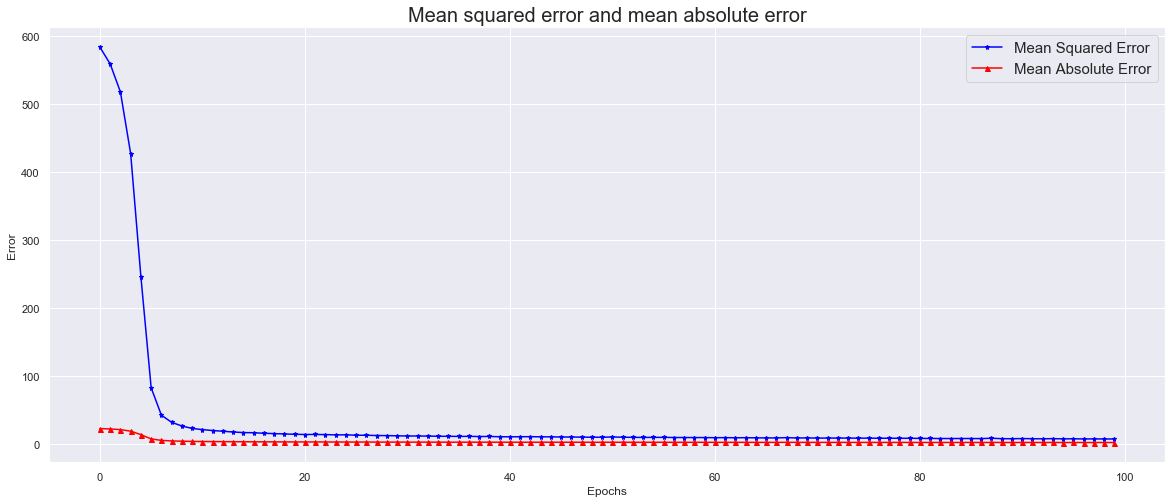

In [46]:
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(20,8),facecolor='w', edgecolor='k')
# Plot the results from the neural network
plt.plot(history.history['mean_squared_error'], label="Mean Squared Error", color='blue', marker='*', markersize=5)
plt.plot(history.history['mean_absolute_error'], label="Mean Absolute Error", color='red', marker='^', markersize=5)
plt.title('Mean squared error and mean absolute error', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend(loc='upper right', prop={'size': 15})

plt.show()

***
I have experimented with the optimizers and for me Adadelta gives the best results. The mean absolute error is the lowest at 1.8599 and the mean squared error is 7.0382. The loss is also going down through the epochs although it slows down towards the end to 7.0382. From the plot, the learning curve is quite good, the mean squared error goes down drastically suggesting that the neural network is learning fast. The accuracy of the neural network improves very quickly and then is stable. The mean squared error gets very close to the mean absolute error and both are stable very quickly.
***

## References:
***
https://www.ritchieng.com/machine-learning-project-boston-home-prices/
***
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
***
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
***
https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d
***
https://www.kaggle.com/shanekonaung/boston-housing-price-dataset-with-keras
***
https://www.kaggle.com/callmejeffery/boston-house-price-with-keras
***
https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4
***
https://keras.io/optimizers/

## End